In [67]:
# Importing the required packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import joblib
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns

# datasets 
df = pd.read_csv('wine-quality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [54]:
for col in df.columns:
    print(col ,"-",df[col].nunique())

fixed acidity - 68
volatile acidity - 125
citric acid - 87
residual sugar - 310
chlorides - 160
free sulfur dioxide - 132
total sulfur dioxide - 251
density - 890
pH - 103
sulphates - 79
alcohol - 103
quality - 7


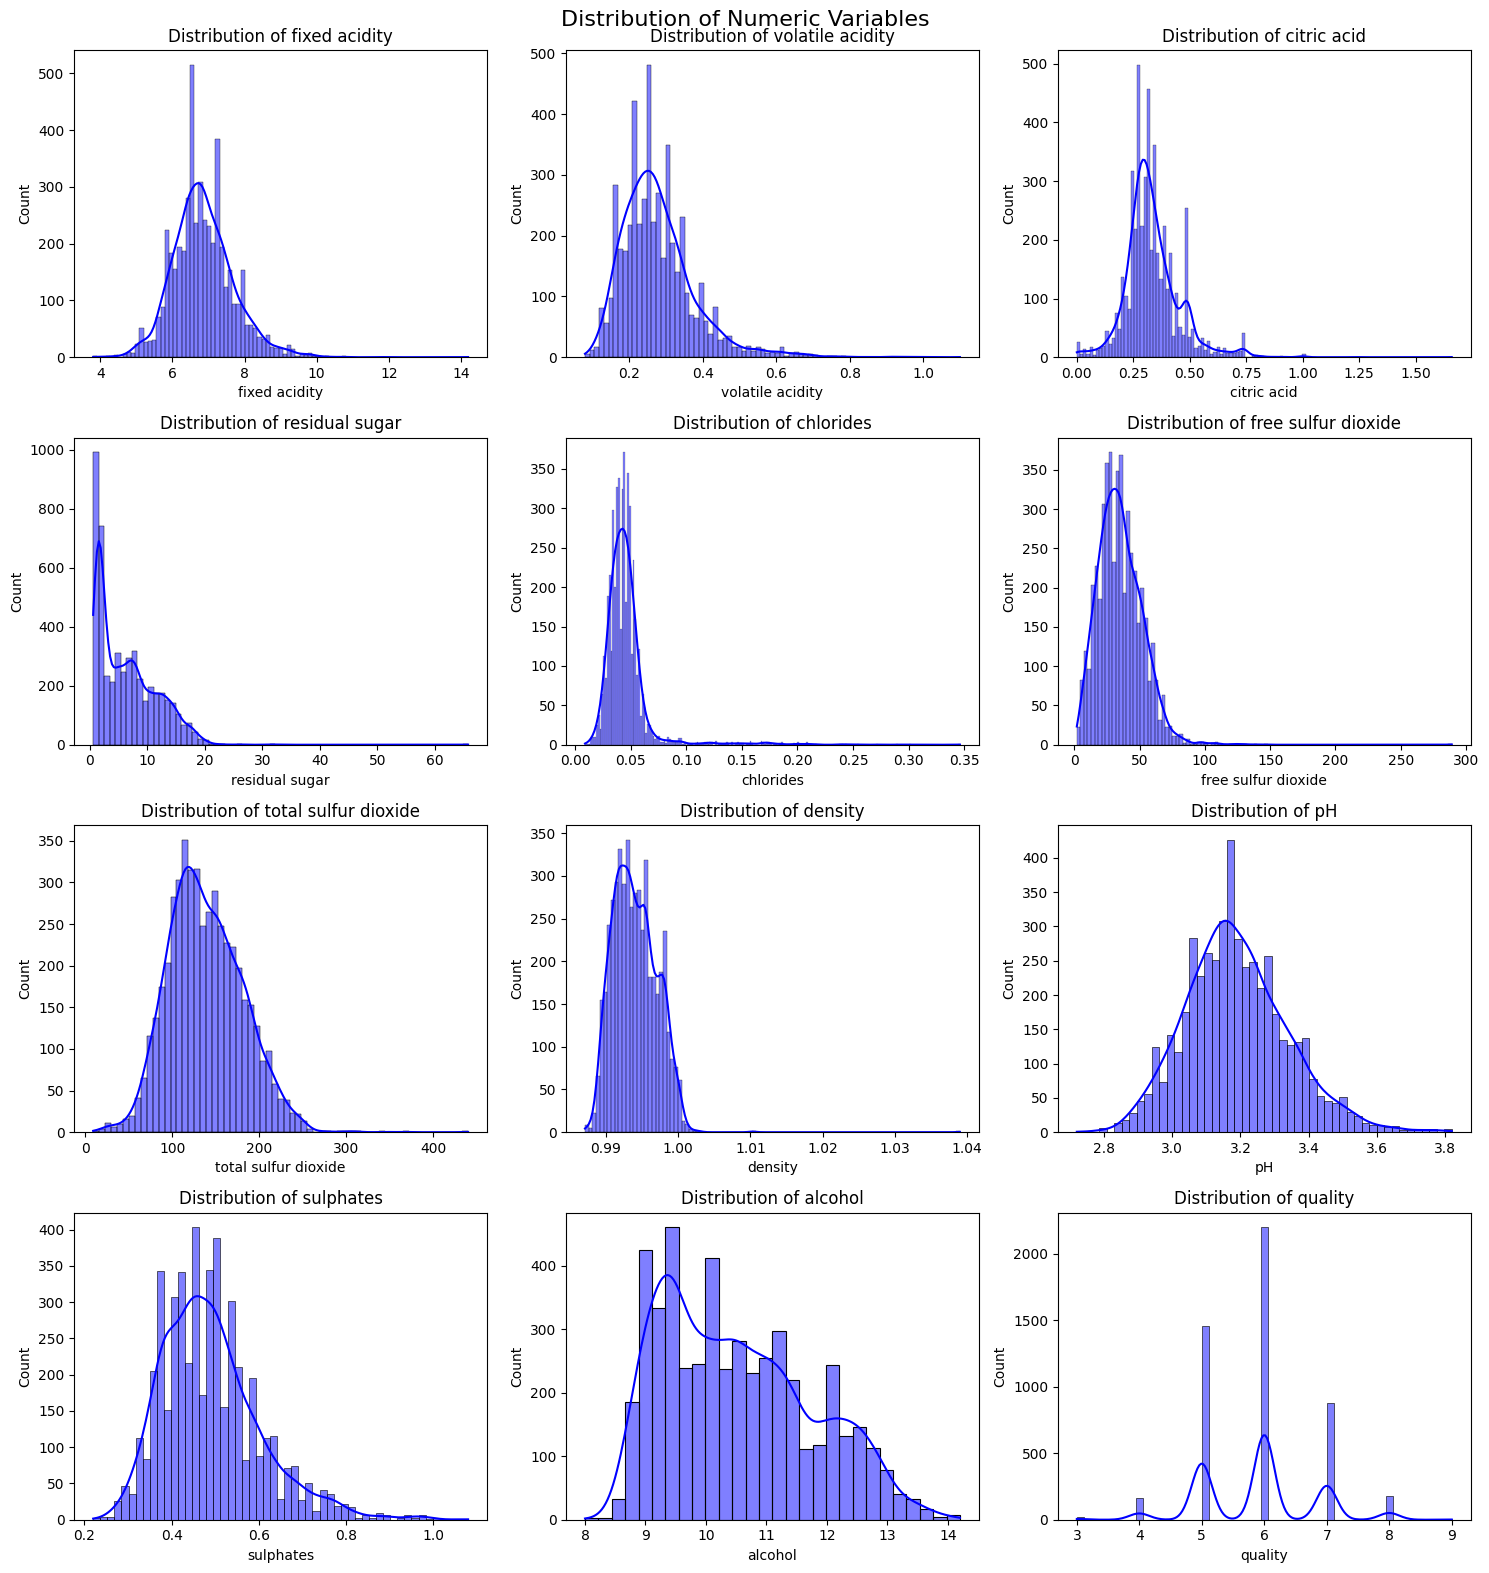

In [72]:
import math

# Filter numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = len(numeric_cols)

# Calculate the number of rows and columns for the subplots
n_rows = math.ceil(n_cols / 3)  # 3 plots per row
n_cols = min(n_cols, 3)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Distribution of Numeric Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print message for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
for col in non_numeric_cols:
    print(f"Skipping {col} as it's not a numeric column")

In [58]:
corr = df.corr()

<Axes: >

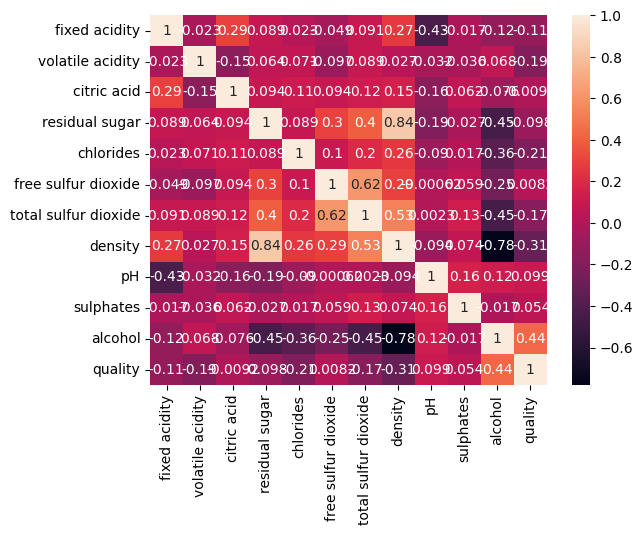

In [60]:
import seaborn as sns
sns.heatmap(corr,annot=True)

In [13]:
print(f"na values- \n{df.isna().sum()}\n\n",
      f"duplicated values - {df.duplicated().sum()}\n\n",
      f"shape of dataset: {df.shape}")

na values- 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 duplicated values - 937

 shape of dataset: (4898, 12)


In [15]:
df.drop_duplicates(inplace= True)
df.shape

(3961, 12)

In [20]:
X = df.drop(columns= 'quality').copy()
y = df['quality'].copy()

print(X.shape,y.shape)

(3961, 11) (3961,)


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2 , random_state= 42)
print(X_train.shape,X_test.shape)

(3168, 11) (793, 11)


In [83]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
rf_forest_clf = RandomForestClassifier()
rf_forest_model = rf_forest_clf.fit(X_train_scaled,y_train)
y_pred = rf_forest_model.predict(X_test_scaled)
metrics.accuracy_score(y_test,y_pred)

0.5397225725094578

In [98]:
cross_val_accuracy = model_selection.cross_val_score(rf_forest_clf, 
                                X,y,
                                cv = 5 ,
                                n_jobs= -1,
                                verbose=0,
                                scoring="accuracy")
print(cross_val_accuracy)
print(cross_val_accuracy.mean())

[0.51324086 0.51641414 0.5719697  0.50883838 0.53914141]
0.5299208987733579


In [95]:
grid_search = model_selection.GridSearchCV(estimator= rf_forest_clf,
                             param_grid= {'n_estimators': [400,500],
                                          'max_depth':[10,15,20],
                                          'criterion':['entropy','log_loss']},
                             cv =5)
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.5409836065573771

In [96]:
best_estimator = grid_search.best_estimator_
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 500}

In [89]:
cross_val_accuracy = model_selection.cross_val_score(best_estimator, 
                                X,y,
                                cv = 5 ,
                                n_jobs= -1,
                                verbose=0,
                                scoring="accuracy")
print(cross_val_accuracy)
print(cross_val_accuracy.mean())

[0.52837327 0.51136364 0.56186869 0.50505051 0.54292929]
0.529917077458061
